In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

epsilon_0=55.26349406E-4         # Vacuum permitivitty in e² eV⁻¹ Å⁻¹
K_electric=1/(4*np.pi*epsilon_0) # Electric constant in eV Å e⁻²

# TEST 1: Ion inside a rocksalt structure.

In [2]:
def madelung_rocksalt1(threshold_x=10,threshold_y=10,threshold_z=10) : 
    """ Calculates the madelung constant for a cubic cell """ 
    summ=0
    for i in range(-threshold_x,threshold_x+1) :
        for j in range(-threshold_y,threshold_y+1) : 
            for k in range(-threshold_z,threshold_z+1) : 
                if (i,j,k)!=(0,0,0) : 
                    summ+=((-1)**(i+j+k))/np.sqrt(i**2+j**2+k**2)
    return summ 

for threshold in range(0,15) : 
    print(threshold , madelung_rocksalt1(threshold, threshold, threshold))

0 0
1 -2.1335207792784368
2 -1.516646336266923
3 -1.9125039789591567
4 -1.6192696788703898
5 -1.852535490412281
6 -1.6587422894726997
7 -1.8245442337282207
8 -1.6796412454744765
9 -1.8083381857782097
10 -1.6925789282594415
11 -1.7977689192231834
12 -1.701376603826924
13 -1.7903312603332933
14 -1.7077473493105542


#### Conclussion:
Expansions with predominance of either possitive or negative ions gets convergence slow. Average between the last two and it should converge faster 

In [3]:
summ=0
old=0
for threshold in range(0,15) :
    summ=madelung_rocksalt1(threshold, threshold, threshold)
    avg=0.5*(summ+old)
    old=summ
    print(threshold,summ,avg )

0 0 0.0
1 -2.1335207792784368 -1.0667603896392184
2 -1.516646336266923 -1.8250835577726798
3 -1.9125039789591567 -1.71457515761304
4 -1.6192696788703898 -1.7658868289147733
5 -1.852535490412281 -1.7359025846413354
6 -1.6587422894726997 -1.7556388899424904
7 -1.8245442337282207 -1.7416432616004602
8 -1.6796412454744765 -1.7520927396013486
9 -1.8083381857782097 -1.743989715626343
10 -1.6925789282594415 -1.7504585570188256
11 -1.7977689192231834 -1.7451739237413124
12 -1.701376603826924 -1.7495727615250538
13 -1.7903312603332933 -1.7458539320801085
14 -1.7077473493105542 -1.7490393048219237


#### Conclussion: 
Still slow convergence, but we have three significant digits. 

### Test 2: ion atop a rocksalt structure. Pseudomadelung. 

Text(0, 0.5, 'Pseudo-Madelung_constant / -')

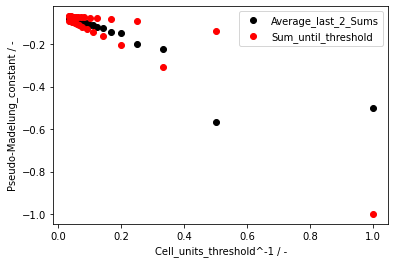

In [4]:
def madelung_rocksalt2(threshold_x=10,threshold_y=10,threshold_z=10) : 
    """ Calculates the madelung constant for an ion sitting on an infinite cube""" 
    summ=0
    for i in range(-threshold_x,threshold_x+1) :
        for j in range(-threshold_y,threshold_y+1) :
            # Now we start from 1! "If" sentence not longer needed. 
            for k in range(1,threshold_z+2) : 
                summ+=((-1)**(i+j+k))/np.sqrt(i**2+j**2+k**2)
    return summ 

summ=0
old=0
x_mad2=[]
y_mad2s=[]
y_mad2a=[]
for threshold in range(0,30) :
    summ=madelung_rocksalt2(threshold, threshold, threshold)
    avg=0.5*(summ+old)
    old=summ
    #print(threshold,summ,avg)
    x_mad2.append(1.0/(threshold+1.0))
    y_mad2s.append(summ)
    y_mad2a.append(avg)

fig2,plot_mad2=plt.subplots()
plot_mad2.plot(x_mad2, y_mad2a, 'o', color='black', label='Average_last_2_Sums')
plot_mad2.plot(x_mad2, y_mad2s, 'o', color='red',   label='Sum_until_threshold')
plot_mad2.legend()
plot_mad2.set_xlabel('Cell_units_threshold^-1 / -')
plot_mad2.set_ylabel('Pseudo-Madelung_constant / -')

#### Conclussion: 
The numbers tend to go down with a very slow convergence! 

I would expect something around 1/3 the previous value (0.58)

Yet, I am getting 1 order of magnitude less stabilization. 

Explanation, only on the top plane: 

- My first neighbour attracts (0,0). 

- Then, four neighbours repel me (±1,0) (0,±1).    

- Then, four neighbours attract me, but they are farther (±1,±1). 

- "avg" converges asymptotically as a function of 1/threshold from the 10th term. 


In [5]:
#summ=0
#old=0
#for threshold in range(0,30) :
#    summ=madelung_rocksalt2(2*threshold, 2*threshold, threshold)
#    avg=0.5*(summ+old)
#    old=summ
#    print(threshold,summ,avg )
#    
#print("Trying cubic column")
#summ=0
#old=0
#for threshold in range(0,30) :
#    summ=madelung_rocksalt2(threshold, threshold, 2*threshold)
#    avg=0.5*(summ+old)
#    old=summ
#    print(threshold,summ,avg )       

### Test 3: Separate the sumation in a fixed part and the adsorbate.
Now the adsorbate will be fixed. However, the represented cell won't be symmetric! 

Text(0, 0.5, 'Pseudo-Madelung_constant / -')

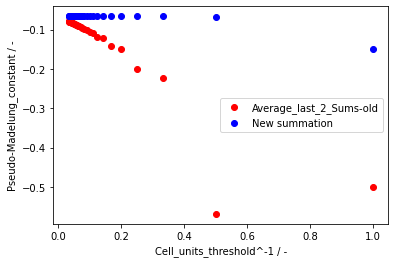

In [6]:
def madelung_rocksalt3(ads,ions,threshold_x=10,threshold_y=10,threshold_z=10) : 
    """ Calculates the madelung constant for an adsorbate on an extended cube.
        Ions of each unit cell fed appart
        Position of the contact ion is (0,0,0)
        cell multiplied manually by 2×2×2""" 
     
    #print(ions)
    summ=0
    for ion in ions: 
        #print(ion)
        for i in range(-threshold_x,threshold_x+1) :
            for j in range(-threshold_y,threshold_y+1) : 
                for k in range(0,threshold_z+1) : 
                    summ+=ads[0]*ion[0]/np.sqrt(( 2.0*(i+ion[1]-ads[1]) )**2+\
                                               ( 2.0*(j+ion[2]-ads[2]) )**2+\
                                               ( 2.0*(k+ion[3]-ads[3]) )**2  )
    return summ 

ions=[np.array([-1.0,0.0,0.0,0.0]),\
      np.array([ 1.0,0.5,0.0,0.0]),\
      np.array([ 1.0,0.0,0.5,0.0]),\
      np.array([ 1.0,0.0,0.0,0.5]),\
      np.array([-1.0,0.5,0.5,0.0]),\
      np.array([-1.0,0.0,0.5,0.5]),\
      np.array([-1.0,0.5,0.0,0.5]),\
      np.array([ 1.0,0.5,0.5,0.5])]

adsorbate=np.array([1.0,0.0,0.0,-0.5]) # charge, x, y, z 

x_mad3=[]
y_mad3=[]
for threshold in range(0,30) : 
    #print(threshold,madelung_rocksalt3(adsorbate,ions,threshold, threshold, threshold))
    x_mad3.append(1.0/(threshold+1.0))
    y_mad3.append(madelung_rocksalt3(adsorbate,ions,threshold, threshold, threshold))
    
fig3,plot_mad3=plt.subplots()
plot_mad3.plot(x_mad2, y_mad2a, 'o', color='red',  label='Average_last_2_Sums-old')
plot_mad3.plot(x_mad3, y_mad3,  'o', color='blue', label='New summation')
plot_mad3.legend()
plot_mad3.set_xlabel('Cell_units_threshold^-1 / -')
plot_mad3.set_ylabel('Pseudo-Madelung_constant / -')

#### Conclussions
- It gives the same result that the averaging+extrapolation tried before. 
- It converges very early: threshold=3.  
- It does not require extrapolations! 
#### Now let us move from dimentionless Madelung to electrons-angstrom units.

Text(0, 0.5, 'Electric energy / eV')

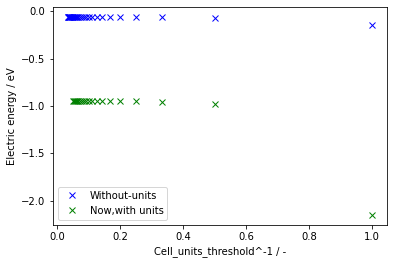

In [7]:
def madelung_rocksalt4(adsorbates,ions,cell,threshold_x=10,threshold_y=10,threshold_z=10) : 
    """ Calculates the madelung constant for an adsorbate on an extended cube.
        Ions of each unit cell fed appart
        Position of the contact ion is (0,0,0)
        cell multiplied manually by 2×2×2""" 
     
    summ=0
    for ads in adsorbates: 
         for ion in ions: 
            for i in range(-threshold_x,threshold_x+1) :
                for j in range(-threshold_y,threshold_y+1) : 
                    for k in range(0,threshold_z+1) : 
                        # calculate distance vector in direct, cartesian, and energy. 
                        v_d=(i+ion[1]-ads[1],j+ion[2]-ads[2],k+ion[3]-ads[3])
                        v_c=(cell[0][0]*v_d[0]+cell[1][0]*v_d[1]+cell[2][0]*v_d[2],
                             cell[0][1]*v_d[0]+cell[1][1]*v_d[1]+cell[2][1]*v_d[2],
                             cell[0][2]*v_d[0]+cell[1][2]*v_d[1]+cell[2][2]*v_d[2])
                        summ+=ads[0]*ion[0]/np.sqrt(v_c[0]**2+v_c[1]**2+v_c[2]**2)
    summ=K_electric*summ # Without this term, this graph and the previous superposes. 
    return summ 

adss=[np.array([1.0,0.0,0.0,-0.5])] # charge, x, y, z 

ions=[np.array([-1.0,0.0,0.0,0.0]),\
      np.array([ 1.0,0.5,0.0,0.0]),\
      np.array([ 1.0,0.0,0.5,0.0]),\
      np.array([ 1.0,0.0,0.0,0.5]),\
      np.array([-1.0,0.5,0.5,0.0]),\
      np.array([-1.0,0.0,0.5,0.5]),\
      np.array([-1.0,0.5,0.0,0.5]),\
      np.array([ 1.0,0.5,0.5,0.5])]

latt=[np.array([ 2.0, 0.0, 0.0]),\
      np.array([ 0.0, 2.0, 0.0]),\
      np.array([ 0.0, 0.0, 2.0])]

x_mad4=[]
y_mad4=[]
for threshold in range(0,20) : 
    x_mad4.append(1.0/(threshold+1.0))
    y_mad4.append(madelung_rocksalt4(adss,ions,latt,threshold,threshold,threshold))
    
fig4,plot_mad4=plt.subplots()
plot_mad4.plot(x_mad3, y_mad3, 'x', color='blue',  label='Without-units')
plot_mad4.plot(x_mad4, y_mad4, 'x', color='green', label='Now,with units')
plot_mad4.legend()
plot_mad4.set_xlabel('Cell_units_threshold^-1 / -')
plot_mad4.set_ylabel('Electric energy / eV')
